# 회귀분석_ 최적회귀_정규화_tree회귀

## 보스턴 집값 데이터 회귀분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ADsP/main/01%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%8D%B0%EC%9D%B4%ED%84%B0.csv')
data

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   범죄율           506 non-null    float64
 1   25,000평방피트초과  506 non-null    float64
 2   비소매상업지역비율     506 non-null    float64
 3   찰스강경계         506 non-null    int64  
 4   농축 일산화질소      506 non-null    float64
 5   가구당평균방수       506 non-null    float64
 6   1940년이전건축비율   506 non-null    float64
 7   직업센터접근성       506 non-null    float64
 8   도로접근성         506 non-null    int64  
 9   재산세율          506 non-null    float64
 10  학생/교사비율       506 non-null    float64
 11  흑인비율          506 non-null    float64
 12  하위계층비율        506 non-null    float64
 13  주택가격          506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
data.describe()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
data.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

<Axes: >

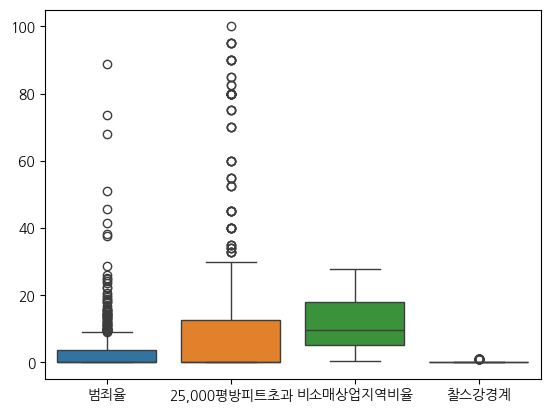

In [10]:
sns.boxplot(data[['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계']])

<Axes: >

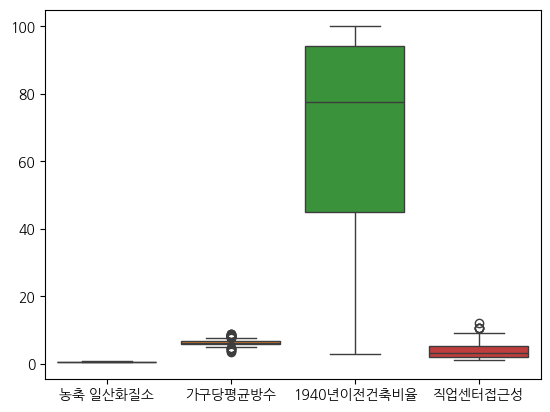

In [11]:
sns.boxplot(data[['농축 일산화질소', '가구당평균방수','1940년이전건축비율', '직업센터접근성']])

<Axes: >

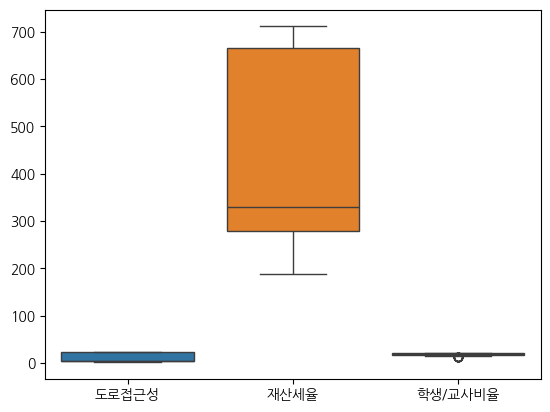

In [12]:
sns.boxplot(data[['도로접근성', '재산세율', '학생/교사비율']])

<Axes: >

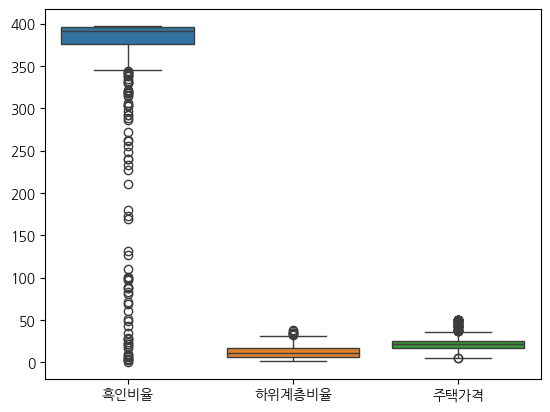

In [13]:
sns.boxplot(data[['흑인비율', '하위계층비율','주택가격']])

In [19]:
# 각 컬럼을 박스 플롯으로 확인
# for col in data:
# #     print(col)
#     print('='*30, col, '='*30)
#     print(data[col].describe())
    
#     sns.boxplot(data[col])
#     plt.show()
#     print('\n\n')
    
#     sns.histplot(data[col])
#     plt.show()
#     print('\n\n')

In [16]:
data.corr(method='spearman')

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
범죄율,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
"25,000평방피트초과",-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
비소매상업지역비율,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
찰스강경계,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
농축 일산화질소,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
가구당평균방수,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
1940년이전건축비율,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
직업센터접근성,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
도로접근성,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
재산세율,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


<Axes: >

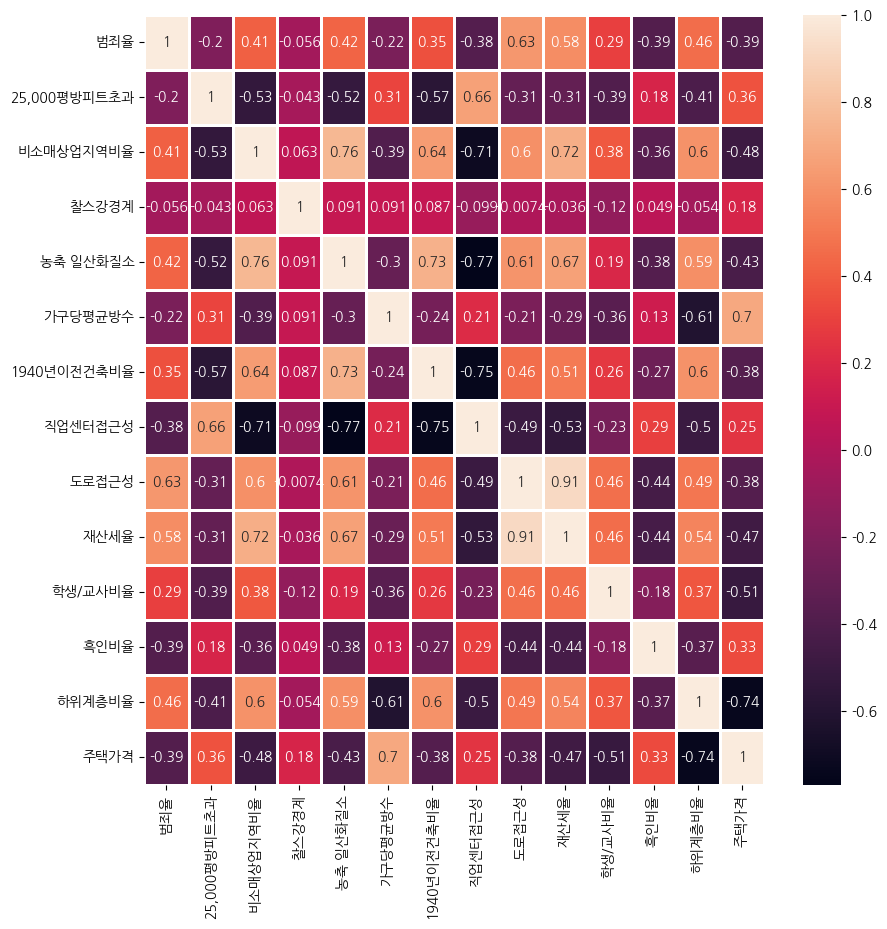

In [18]:
# 데이터 컬럼 간의 연관성 확인
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidth=1)

In [20]:
X = data.drop('주택가격',axis=1)
y = data['주택가격']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
X_train2 = X_train.copy()
X_test2 = X_test.copy()

## 스케일 맞추기

In [25]:
from sklearn.preprocessing import RobustScaler

In [27]:
rs = RobustScaler()
rs.fit(X_train)

rs_X_train = rs.transform(X_train)
rs_X_test = rs.transform(X_test)

rs_X_train = pd.DataFrame(rs_X_train, columns=X_train.columns, index=X_train.index)
rs_X_test = pd.DataFrame(rs_X_test, columns=X_test.columns, index=X_test.index)

In [28]:
rs_X_train

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
5,-0.070845,0.0,-0.579029,0.0,-0.441989,0.255601,-0.393045,0.888157,-0.10,-0.279070,0.028169,0.129964,-0.610414
116,-0.039048,0.0,0.024672,0.0,0.049724,-0.065005,-0.102213,-0.113375,0.05,0.263566,-0.225352,0.087674,0.119092
45,-0.026596,0.0,-0.214341,0.0,-0.497238,-0.688545,-0.917808,0.599068,-0.10,-0.250646,-0.197183,0.273337,-0.076368
16,0.249243,0.0,-0.119507,0.0,0.000000,-0.369202,-1.012645,0.418185,-0.05,-0.059432,0.676056,-0.244972,-0.464085
468,4.788193,0.0,0.648419,0.0,0.232044,-0.380562,-0.133825,-0.059784,0.95,0.868217,0.450704,-1.178958,0.769559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.026665,0.0,-0.087124,0.0,-0.099448,-0.494162,0.306639,-0.269402,0.00,0.139535,0.647887,0.209902,0.826168
270,0.013331,1.0,-0.210486,0.0,-0.408840,-0.468918,-0.742887,0.397265,-0.10,-0.276486,0.000000,-0.152140,0.221629
348,-0.075484,4.0,-0.592136,0.0,-0.569061,0.514358,-1.004215,1.574001,-0.05,-0.129199,-0.450704,-0.034038,-0.527103
435,3.408139,0.0,0.648419,0.0,1.116022,0.506784,0.363541,-0.295341,0.95,0.868217,0.450704,-14.530686,1.318558


In [30]:
rs_X_test

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
173,-0.051488,0.0,-0.434850,0.0,-0.154696,0.237930,0.142255,-0.138563,0.00,-0.087855,-0.563380,0.201135,-0.201335
274,-0.062534,2.0,-0.252891,1.0,-0.502762,0.669612,-0.936776,0.291644,-0.05,-0.196382,-0.281690,0.273337,-0.789853
491,-0.047125,0.0,1.391673,0.0,0.392265,-0.308615,0.452055,-0.372468,-0.05,0.984496,0.422535,-0.076844,0.763151
72,-0.051532,0.0,0.086353,0.0,-0.690608,-0.205112,-1.465753,0.655245,-0.05,-0.064599,0.169014,-0.035585,-0.577303
452,1.510817,0.0,0.648419,0.0,0.966851,0.087725,0.304531,-0.222152,0.95,0.868217,0.450704,-0.335740,0.677704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2.959232,0.0,0.648419,0.0,1.116022,0.225308,0.418335,-0.313255,0.95,0.868217,0.450704,-0.290872,0.918024
23,0.228770,0.0,-0.119507,0.0,0.000000,-0.523193,0.477345,0.296934,-0.05,-0.059432,0.676056,0.151625,0.956475
225,0.084523,0.0,-0.269082,0.0,-0.187845,3.152414,0.119073,-0.063992,0.15,-0.059432,-0.338028,-0.495101,-0.672363
433,1.664254,0.0,0.648419,0.0,0.966851,0.263175,0.222339,-0.237902,0.95,0.868217,0.450704,-15.028881,0.565554


# 선형회귀분석

In [47]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [32]:
# 상수항 추가
rs_X_train_const = sm.add_constant(rs_X_train)
rs_X_test_const = sm.add_constant(rs_X_test)

In [33]:
rs_X_train_const.head(2)

,const,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
5,1.0,-0.070845,0.0,-0.579029,0.0,-0.441989,0.255601,-0.393045,0.888157,-0.10,-0.279070,0.028169,0.129964,-0.610414
116,1.0,-0.039048,0.0,0.024672,0.0,0.049724,-0.065005,-0.102213,-0.113375,0.05,0.263566,-0.225352,0.087674,0.119092


In [34]:
rs_X_test_const.head(2)

,const,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
173,1.0,-0.051488,0.0,-0.434850,0.0,-0.154696,0.237930,0.142255,-0.138563,0.00,-0.087855,-0.56338,0.201135,-0.201335
274,1.0,-0.062534,2.0,-0.252891,1.0,-0.502762,0.669612,-0.936776,0.291644,-0.05,-0.196382,-0.28169,0.273337,-0.789853


In [40]:
ols = sm.OLS(y_train, rs_X_train_const).fit()
pred = ols.predict(rs_X_test_const)

print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred)))
print('R2_Score: ', r2_score(y_test, pred))

MAE:  3.162709871457414
MSE:  21.517444231177297
RMSE:  4.63868992617283
R2_Score:  0.711226005748492


In [41]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Thu, 08 May 2025   Prob (F-statistic):           4.96e-92
Time:                        14:33:52   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.9494      0.408     58.755   

In [43]:
result = pd.DataFrame(dict(y_test=y_test, pred=pred))

In [45]:
result['잔차'] = result['y_test'] - result['pred']
result['잔차제곱'] = result['잔차']**2
result['MSE'] = result['잔차제곱'].mean()
result['RMSE'] = result['MSE'].apply(np.sqrt)


In [46]:
result

,y_test,pred,잔차,잔차제곱,MSE,RMSE
173,23.6,28.648960,-5.048960,25.491998,21.517444,4.63869
274,32.4,36.495014,-4.095014,16.769138,21.517444,4.63869
491,13.6,15.411193,-1.811193,3.280421,21.517444,4.63869
72,22.8,25.403213,-2.603213,6.776718,21.517444,4.63869
452,16.1,18.855280,-2.755280,7.591567,21.517444,4.63869
...,...,...,...,...,...,...
441,17.1,17.403672,-0.303672,0.092216,21.517444,4.63869
23,14.5,13.385941,1.114059,1.241127,21.517444,4.63869
225,50.0,39.983425,10.016575,100.331779,21.517444,4.63869
433,14.3,16.682863,-2.382863,5.678036,21.517444,4.63869


# 최적회귀 구하기
- 1. 전진선택법
- 2. 후진제거법

In [48]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

### 전진선택법으로 분석

In [53]:
sfs_fw = SequentialFeatureSelector(estimator=model, direction='forward', scoring='r2', cv=5, n_jobs=4)
sfs_fw.fit(rs_X_train_const, y_train)
# print(sfs_fw.get_support())

selected_cols = rs_X_train_const.columns[sfs_fw.get_support()]
print('전진선택법으로 선택된 컬럼: ', list(selected_cols))

[False  True False False  True  True  True False  True False False  True
 False  True]
전진선택법으로 선택된 컬럼:  ['범죄율', '찰스강경계', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '학생/교사비율', '하위계층비율']


In [61]:
print('원래 컬럼수:',len(rs_X_train_const.columns))
print('selected_cols:',len(selected_cols))

원래 컬럼수: 14
selected_cols: 7


In [66]:
fw_X_train = rs_X_train_const[['const','범죄율', '찰스강경계', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '학생/교사비율', '하위계층비율']]
fw_X_test = rs_X_test_const[['const','범죄율', '찰스강경계', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '학생/교사비율', '하위계층비율']]

In [67]:
ols2 = sm.OLS(y_train, fw_X_train).fit()
pred2 = ols2.predict(fw_X_test)

print('MAE: ', mean_absolute_error(y_test, pred2))
print('MSE: ', mean_squared_error(y_test, pred2))
print('RMSE: ', root_mean_squared_error(y_test, pred2))
print('R2_Score: ', r2_score(y_test, pred2))

MAE:  3.310296758822148
MSE:  23.361549390774957
RMSE:  4.833378672396252
R2_Score:  0.6864772666772769


In [68]:
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     130.6
Date:                Thu, 08 May 2025   Prob (F-statistic):           4.33e-93
Time:                        15:11:07   Log-Likelihood:                -1065.8
No. Observations:                 354   AIC:                             2148.
Df Residuals:                     346   BIC:                             2179.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2035      0.370     65.339      0.0

### 후진제거법으로 분석

In [72]:
sfs_bw = SequentialFeatureSelector(estimator=model, direction='backward', scoring='r2', cv=5, n_jobs=4)
sfs_bw.fit(rs_X_train_const, y_train)
# print(sfs_bw.get_support())

selected_cols = rs_X_train_const.columns[sfs_bw.get_support()]
print('후진선택법으로 선택된 컬럼: ', list(selected_cols))

print('원래 컬럼수:',len(rs_X_train_const.columns))
print('selected_cols:',len(selected_cols))

후진선택법으로 선택된 컬럼:  ['범죄율', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '도로접근성', '학생/교사비율', '하위계층비율']
원래 컬럼수: 14
selected_cols: 7


In [73]:
bw_X_train = rs_X_train_const[['const','범죄율', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '도로접근성', '학생/교사비율', '하위계층비율']]
bw_X_test = rs_X_test_const[['const','범죄율', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '도로접근성', '학생/교사비율', '하위계층비율']]

In [74]:
ols3 = sm.OLS(y_train, bw_X_train).fit()
pred3 = ols3.predict(bw_X_test)

print('MAE: ', mean_absolute_error(y_test, pred3))
print('MSE: ', mean_squared_error(y_test, pred3))
print('RMSE: ', root_mean_squared_error(y_test, pred3))
print('R2_Score: ', r2_score(y_test, pred3))


MAE:  3.34663342149867
MSE:  22.707104989677813
RMSE:  4.765197266606894
R2_Score:  0.6952602114215476


In [75]:
print(ols3.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     126.4
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.37e-91
Time:                        15:20:39   Log-Likelihood:                -1069.9
No. Observations:                 354   AIC:                             2156.
Df Residuals:                     346   BIC:                             2187.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2492      0.384     63.158      0.0

## 선형회귀 모델 성능 향상 : 정규화를 통한 선형회귀 변수 선택법

### 정규화 회귀 사용 목적 : 과적합(Overfitting) 방지 및 범용성 확장

### 1) Lasso 회귀(L1규제)
- 가중치의 절대값의 합을 최소화
- 일부 가중치를 0으로 만들어서 변수를 무력화
- 변수를 선택하는 효과
- 불필요한 변수 제거

### 2) Ridge 회귀(L2규제)
- 가중치의 제곱합을 최소화
- 계수를 0에 가깝게 만들지만 제거는 하지 않음
- 다중공산성 해결에 효과적

### 3) Elastic Net(혼합 규제, L1+L2)
- L1규제와 L2규제를 결합한 모델
- Lasso와 Ridge의 장점을 모두 활용
- 변수 간 상관관계가 높을 때 효과적


## Lasso 회귀(L1규제, 절대값, 변수제외)

In [76]:
from sklearn.linear_model import Lasso

In [80]:
lasso = Lasso(alpha=1.0)
lasso.fit(rs_X_train, y_train)
pred = lasso.predict(rs_X_test)
lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
display(lasso_result)


print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))
print('R2_Score: ', r2_score(y_test, pred))

,0
범죄율,-0.333223
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.577229
1940년이전건축비율,-0.000000
직업센터접근성,-0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  3.9077374074166245
MSE:  28.65439334808176
RMSE:  5.35297985687241
R2_Score:  0.6154448673792763


#### alpha 값을 변경하면서 비교

In [92]:
for i in range(1,10):
    lasso = Lasso(alpha=i)
    lasso.fit(rs_X_train, y_train)
    pred = lasso.predict(rs_X_test)
    lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
    
    print('='*30, f"alpha = {i}", '='*30)
    display(lasso_result)
    
    print('MAE: ', mean_absolute_error(y_test, pred))
    print('MSE: ', mean_squared_error(y_test, pred))
    print('RMSE: ', root_mean_squared_error(y_test, pred))
    print('R2_Score: ', r2_score(y_test, pred))
    print()
    

============================== alpha = 1 ==============================


,0
범죄율,-0.333223
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.577229
1940년이전건축비율,-0.000000
직업센터접근성,-0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  3.9077374074166245
MSE:  28.65439334808176
RMSE:  5.35297985687241
R2_Score:  0.6154448673792763

============================== alpha = 2 ==============================


,0
범죄율,-0.414809
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.204754
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  4.212059698467132
MSE:  33.477076816147886
RMSE:  5.785937851044365
R2_Score:  0.5507222380036978

============================== alpha = 3 ==============================


,0
범죄율,-0.464670
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,2.723719
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  4.59198504132359
MSE:  40.48718716053476
RMSE:  6.362954279305703
R2_Score:  0.45664333427593606

============================== alpha = 4 ==============================


,0
범죄율,-0.457179
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,1.866634
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  5.097964455293584
MSE:  48.92403004156567
RMSE:  6.994571469473
R2_Score:  0.343417023964528

============================== alpha = 5 ==============================


,0
범죄율,-0.400917
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.690210
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  5.610496621412412
MSE:  58.10207890467499
RMSE:  7.622471968113428
R2_Score:  0.22024338860334658

============================== alpha = 6 ==============================


,0
범죄율,-0.312229
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  5.961446000746035
MSE:  65.17638641213661
RMSE:  8.073189358124619
R2_Score:  0.12530292943240406

============================== alpha = 7 ==============================


,0
범죄율,-0.177507
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  6.048084055264632
MSE:  67.07453231192318
RMSE:  8.189904291987983
R2_Score:  0.09982893878256283

============================== alpha = 8 ==============================


,0
범죄율,-0.042785
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  6.151545715404532
MSE:  69.42407034408916
RMSE:  8.332110797636405
R2_Score:  0.06829705818815102

============================== alpha = 9 ==============================


,0
범죄율,-0.000000
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MAE:  6.2324692707016665
MSE:  70.92756046126868
RMSE:  8.421850180409805
R2_Score:  0.04811952958433485



## Ridge 회귀(L2규제, 제곱합, 변수를 0에 가깝게 만들어 무력화)

In [85]:
 from sklearn.linear_model import Ridge

In [86]:
ridge = Ridge(alpha=1.0)
ridge.fit(rs_X_train, y_train)
pred = ridge.predict(rs_X_test)

ridge_result = pd.DataFrame(ridge.coef_, index=ridge.feature_names_in_)
display(ridge_result)

print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))
print('R2_Score: ', r2_score(y_test, pred))

,0
범죄율,-0.415266
"25,000평방피트초과",0.665007
비소매상업지역비율,0.461989
찰스강경계,3.070278
농축 일산화질소,-2.635082
가구당평균방수,3.253306
1940년이전건축비율,-0.522602
직업센터접근성,-4.460516
도로접근성,4.095406
재산세율,-2.635815


MAE:  3.169629806280323
MSE:  21.712741346480236
RMSE:  4.659693267424395
R2_Score:  0.7086050286730589


In [90]:
ridge = Ridge(alpha=60)
ridge.fit(rs_X_train, y_train)
pred = ridge.predict(rs_X_test)

ridge_result = pd.DataFrame(ridge.coef_, index=ridge.feature_names_in_)
display(ridge_result)

print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))
print('R2_Score: ', r2_score(y_test, pred))

,0
범죄율,-0.384378
"25,000평방피트초과",0.363469
비소매상업지역비율,-0.262118
찰스강경계,1.208454
농축 일산화질소,-0.652522
가구당평균방수,3.486964
1940년이전건축비율,-0.328958
직업센터접근성,-1.722266
도로접근성,0.360986
재산세율,-0.318727


MAE:  3.4002021957544
MSE:  24.524205964130896
RMSE:  4.952192036273522
R2_Score:  0.6708738809301771


In [93]:
for i in range(1,10):
    ridge = Ridge(alpha=i)
    ridge.fit(rs_X_train, y_train)
    pred = ridge.predict(rs_X_test)
    ridge_result = pd.DataFrame(ridge.coef_, index=ridge.feature_names_in_)
    
    print('='*30, f"alpha = {i}", '='*30)
    display(ridge_result)

    print('MAE: ', mean_absolute_error(y_test, pred))
    print('MSE: ', mean_squared_error(y_test, pred))
    print('RMSE: ', root_mean_squared_error(y_test, pred))
    print('R2_Score: ', r2_score(y_test, pred))
    print()
    

============================== alpha = 1 ==============================


,0
범죄율,-0.415266
"25,000평방피트초과",0.665007
비소매상업지역비율,0.461989
찰스강경계,3.070278
농축 일산화질소,-2.635082
가구당평균방수,3.253306
1940년이전건축비율,-0.522602
직업센터접근성,-4.460516
도로접근성,4.095406
재산세율,-2.635815


MAE:  3.169629806280323
MSE:  21.712741346480236
RMSE:  4.659693267424395
R2_Score:  0.7086050286730589

============================== alpha = 2 ==============================


,0
범죄율,-0.406575
"25,000평방피트초과",0.627659
비소매상업지역비율,0.340413
찰스강경계,3.005801
농축 일산화질소,-2.498249
가구당평균방수,3.285038
1940년이전건축비율,-0.526119
직업센터접근성,-4.323774
도로접근성,3.561715
재산세율,-2.146886


MAE:  3.1753806701308167
MSE:  21.874389896147825
RMSE:  4.677006510167355
R2_Score:  0.7064356308184179

============================== alpha = 3 ==============================


,0
범죄율,-0.399811
"25,000평방피트초과",0.598671
비소매상업지역비율,0.253230
찰스강경계,2.935532
농축 일산화질소,-2.375822
가구당평균방수,3.311936
1940년이전건축비율,-0.526353
직업센터접근성,-4.198021
도로접근성,3.162685
재산세율,-1.800203


MAE:  3.1804268452708433
MSE:  22.01065303561494
RMSE:  4.691551239794247
R2_Score:  0.704606916839638

============================== alpha = 4 ==============================


,0
범죄율,-0.394370
"25,000평방피트초과",0.575186
비소매상업지역비율,0.187826
찰스강경계,2.863810
농축 일산화질소,-2.265159
가구당평균방수,3.335318
1940년이전건축비율,-0.524547
직업센터접근성,-4.081399
도로접근성,2.850944
재산세율,-1.543599


MAE:  3.183788705716337
MSE:  22.128164665939057
RMSE:  4.70405831872215
R2_Score:  0.7030298567345847

============================== alpha = 5 ==============================


,0
범죄율,-0.389891
"25,000평방피트초과",0.555562
비소매상업지역비율,0.137027
찰스강경계,2.792823
농축 일산화질소,-2.164404
가구당평균방수,3.355980
1940년이전건축비율,-0.521422
직업센터접근성,-3.972608
도로접근성,2.599285
재산세율,-1.347408


MAE:  3.1863671689701114
MSE:  22.231633561054384
RMSE:  4.715043325469489
R2_Score:  0.7016412565921964

============================== alpha = 6 ==============================


,0
범죄율,-0.386147
"25,000평방피트초과",0.538783
비소매상업지역비율,0.096462
찰스강경계,2.723692
농축 일산화질소,-2.072161
가구당평균방수,3.374442
1940년이전건축비율,-0.517426
직업센터접근성,-3.870674
도로접근성,2.390926
재산세율,-1.193553


MAE:  3.1888670489720634
MSE:  22.324351700161866
RMSE:  4.724865257355162
R2_Score:  0.7003969365381056

============================== alpha = 7 ==============================


,0
범죄율,-0.382981
"25,000평방피트초과",0.524181
비소매상업지역비율,0.063319
찰스강경계,2.656980
농축 일산화질소,-1.987337
가구당평균방수,3.391067
1940년이전건축비율,-0.512851
직업센터접근성,-3.774826
도로접근성,2.214928
재산세율,-1.070409


MAE:  3.1911103055960597
MSE:  22.408647604598166
RMSE:  4.733777308302342
R2_Score:  0.6992656467454339

============================== alpha = 8 ==============================


,0
범죄율,-0.380285
"25,000평방피트초과",0.511300
비소매상업지역비율,0.035712
찰스강경계,2.592940
농축 일산화질소,-1.909045
가구당평균방수,3.406120
1940년이전건축비율,-0.507895
직업센터접근성,-3.684435
도로접근성,2.063834
재산세율,-0.970176


MAE:  3.1937065846572197
MSE:  22.486200962622252
RMSE:  4.741961720914905
R2_Score:  0.6982248450255073

============================== alpha = 9 ==============================


,0
범죄율,-0.377976
"25,000평방피트초과",0.499813
비소매상업지역비율,0.012332
찰스강경계,2.531650
농축 일산화질소,-1.836551
가구당평균방수,3.419803
1940년이전건축비율,-0.502697
직업센터접근성,-3.598974
도로접근성,1.932375
재산세율,-0.887435


MAE:  3.1967236935620074
MSE:  22.558249882902494
RMSE:  4.749552598182538
R2_Score:  0.6972579153907748



## Elastic Net(Lasso와 Ridge를 동시에 사용, L1+L2)

In [94]:
from sklearn.linear_model import ElasticNet

In [99]:
el_net = ElasticNet(alpha=1.0, l1_ratio=0.3)
el_net.fit(rs_X_train, y_train)
pred = el_net.predict(rs_X_test)

el_net_result = pd.DataFrame(el_net.coef_, index=el_net.feature_names_in_)
display(el_net_result)

print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))
print('R2_Score: ', r2_score(y_test, pred))


,0
범죄율,-0.517059
"25,000평방피트초과",0.339791
비소매상업지역비율,-0.154506
찰스강경계,0.097330
농축 일산화질소,-0.148309
가구당평균방수,2.572544
1940년이전건축비율,-0.009322
직업센터접근성,-0.000000
도로접근성,-0.000000
재산세율,-0.026797


MAE:  4.060212191820497
MSE:  31.804672247478806
RMSE:  5.6395631255868395
R2_Score:  0.5731666762051122


## LassoCV, RidgeCV, ElasticNetCV

In [100]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

In [105]:
alphas = np.logspace(-4, 4, 100)
alphas

array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-03, 5.99484250e-03, 7.22080902e-03,
       8.69749003e-03, 1.04761575e-02, 1.26185688e-02, 1.51991108e-02,
       1.83073828e-02, 2.20513074e-02, 2.65608778e-02, 3.19926714e-02,
       3.85352859e-02, 4.64158883e-02, 5.59081018e-02, 6.73415066e-02,
       8.11130831e-02, 9.77009957e-02, 1.17681195e-01, 1.41747416e-01,
       1.70735265e-01, 2.05651231e-01, 2.47707636e-01, 2.98364724e-01,
       3.59381366e-01, 4.32876128e-01, 5.21400829e-01, 6.28029144e-01,
       7.56463328e-01, 9.11162756e-01, 1.09749877e+00, 1.32194115e+00,
       1.59228279e+00, 1.91791026e+00, 2.31012970e+00, 2.78255940e+00,
      

In [108]:
lassoCV = LassoCV(alphas=alphas, cv=5, n_jobs=4, random_state=42)
lassoCV.fit(rs_X_train, y_train)
print(lassoCV.alpha_)

0.0001


In [110]:
lasso = Lasso(alpha=0.0001)
lasso.fit(rs_X_train, y_train)
pred = lasso.predict(rs_X_test)

lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
display(lasso_result)

print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))
print('R2_Score: ', r2_score(y_test, pred))


,0
범죄율,-0.426890
"25,000평방피트초과",0.715505
비소매상업지역비율,0.638946
찰스강경계,3.119242
농축 일산화질소,-2.788674
가구당평균방수,3.214497
1940년이전건축비율,-0.512853
직업센터접근성,-4.609628
도로접근성,4.845977
재산세율,-3.358698


MAE:  3.1626978497620177
MSE:  21.518888013426658
RMSE:  4.638845547485566
R2_Score:  0.7112066295269251


In [113]:
ridgeCV = RidgeCV(alphas=alphas, cv=5)
ridgeCV.fit(rs_X_train, y_train)
print(ridgeCV.alpha_)

5.857020818056673


In [117]:
ridge = Ridge(alpha=5.857020818056673)
ridge.fit(rs_X_train, y_train)
pred = ridge.predict(rs_X_test)

ridge_result = pd.DataFrame(ridge.coef_, index=ridge.feature_names_in_)
display(ridge_result)

print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))
print('R2_Score: ', r2_score(y_test, pred))

,0
범죄율,-0.386644
"25,000평방피트초과",0.541036
비소매상업지역비율,0.101754
찰스강경계,2.733437
농축 일산화질소,-2.084872
가구당평균방수,3.371922
1940년이전건축비율,-0.518038
직업센터접근성,-3.884860
도로접근성,2.418525
재산세율,-1.213448


MAE:  3.1884878190420727
MSE:  22.311657089649024
RMSE:  4.723521682987072
R2_Score:  0.7005673040475493


In [120]:
ratios = np.linspace(0.1,1,10)
ratios

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [123]:
el_net_CV = ElasticNetCV(alphas=alphas, l1_ratio=ratios, cv=5, n_jobs=4, random_state=42)
el_net_CV.fit(rs_X_train, y_train)
print(el_net_CV.alpha_, el_net_CV.l1_ratio_)

0.010476157527896652 0.1


In [124]:
el_net = ElasticNet(alpha=0.010476157527896652, l1_ratio=0.1)
el_net.fit(rs_X_train, y_train)
pred = el_net.predict(rs_X_test)

el_net_result = pd.DataFrame(el_net.coef_, index=el_net.feature_names_in_)
display(el_net_result)

print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))
print('R2_Score: ', r2_score(y_test, pred))


,0
범죄율,-0.397017
"25,000평방피트초과",0.585676
비소매상업지역비율,0.205407
찰스강경계,2.902729
농축 일산화질소,-2.321846
가구당평균방수,3.321019
1940년이전건축비율,-0.519304
직업센터접근성,-4.143677
도로접근성,2.998840
재산세율,-1.653268


MAE:  3.1819153465449306
MSE:  22.06643646360684
RMSE:  4.697492571958666
R2_Score:  0.7038582775894933


## Tree 계열 회귀 사용
- DecisionTree, RandomForest, xgboost, lightgbm은 모두 회귀 분석 가능

In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### 의사결정회귀모델(DecisionTreeRegressor)

In [127]:
dtr = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr.fit(rs_X_train, y_train)
pred = dtr.predict(rs_X_test)

dtr_result = pd.DataFrame(dtr.feature_importances_, index=dtr.feature_names_in_)
display(dtr_result)

print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))
print('R2_Score: ', r2_score(y_test, pred))


,0
범죄율,0.000000
"25,000평방피트초과",0.000000
비소매상업지역비율,0.000000
찰스강경계,0.000000
농축 일산화질소,0.000000
가구당평균방수,0.644203
1940년이전건축비율,0.000000
직업센터접근성,0.104239
도로접근성,0.020974
재산세율,0.000000


MAE:  3.4432455671681645
MSE:  19.10730653954883
RMSE:  4.371190517416146
R2_Score:  0.7435711616336518


In [130]:
for i in range(1,10):
    dtr = DecisionTreeRegressor(max_depth=i, random_state=42)
    dtr.fit(rs_X_train, y_train)
    pred = dtr.predict(rs_X_test)
    
    print('='*30, f"max_depth = {i}", '='*30)
    dtr_result = pd.DataFrame(dtr.feature_importances_, index=dtr.feature_names_in_)
#     display(dtr_result)

    print('MAE: ', mean_absolute_error(y_test, pred))
    print('MSE: ', mean_squared_error(y_test, pred))
    print('RMSE: ', root_mean_squared_error(y_test, pred))
    print('R2_Score: ', r2_score(y_test, pred))
    print()

============================== max_depth = 1 ==============================
MAE:  4.831093884457055
MSE:  43.524834386010575
RMSE:  6.59733540044847
R2_Score:  0.4158767119483332

============================== max_depth = 2 ==============================
MAE:  3.622167403913773
MSE:  24.153896104489093
RMSE:  4.914661341790408
R2_Score:  0.6758436094969433

============================== max_depth = 3 ==============================
MAE:  3.4432455671681645
MSE:  19.10730653954883
RMSE:  4.371190517416146
R2_Score:  0.7435711616336518

============================== max_depth = 4 ==============================
MAE:  3.048275527115724
MSE:  20.449850335811117
RMSE:  4.522151073970342
R2_Score:  0.7255536066517965

============================== max_depth = 5 ==============================
MAE:  2.475470278442319
MSE:  11.122130049464607
RMSE:  3.33498576450704
R2_Score:  0.8507359013244257

============================== max_depth = 6 ==============================
MAE:  2.3734663516451

In [139]:
dtr = DecisionTreeRegressor(max_depth=6, random_state=42)
dtr.fit(rs_X_train, y_train)
pred = dtr.predict(rs_X_test)

dtr_result = pd.DataFrame(dtr.feature_importances_, index=dtr.feature_names_in_)
display(dtr_result)

print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))
print('R2_Score: ', r2_score(y_test, pred))

,0
범죄율,0.070321
"25,000평방피트초과",0.000000
비소매상업지역비율,0.000000
찰스강경계,0.001283
농축 일산화질소,0.004754
가구당평균방수,0.597263
1940년이전건축비율,0.004603
직업센터접근성,0.109480
도로접근성,0.000021
재산세율,0.000000


MAE:  2.3734663516451775
MSE:  10.398734204198183
RMSE:  3.2247068400396
R2_Score:  0.860444206149952


In [140]:
from sklearn.tree import plot_tree

[Text(0.5431034482758621, 0.9, '가구당평균방수 <= 0.901\nsquared_error = 87.897\nsamples = 354\nvalue = 23.016'),
 Text(0.27586206896551724, 0.7, '하위계층비율 <= 0.371\nsquared_error = 41.295\nsamples = 292\nvalue = 20.084'),
 Text(0.40948275862068967, 0.8, 'True  '),
 Text(0.13793103448275862, 0.5, '직업센터접근성 <= -0.518\nsquared_error = 26.114\nsamples = 178\nvalue = 23.47'),
 Text(0.06896551724137931, 0.3, '범죄율 <= 3.08\nsquared_error = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(0.034482758620689655, 0.1, '\n  (...)  \n'),
 Text(0.10344827586206896, 0.1, '\n  (...)  \n'),
 Text(0.20689655172413793, 0.3, '가구당평균방수 <= 0.398\nsquared_error = 14.233\nsamples = 174\nvalue = 22.987'),
 Text(0.1724137931034483, 0.1, '\n  (...)  \n'),
 Text(0.2413793103448276, 0.1, '\n  (...)  \n'),
 Text(0.41379310344827586, 0.5, '직업센터접근성 <= -0.309\nsquared_error = 19.151\nsamples = 114\nvalue = 14.797'),
 Text(0.3448275862068966, 0.3, '범죄율 <= 2.054\nsquared_error = 12.162\nsamples = 62\nvalue = 12.266'),
 Text(0.31034482

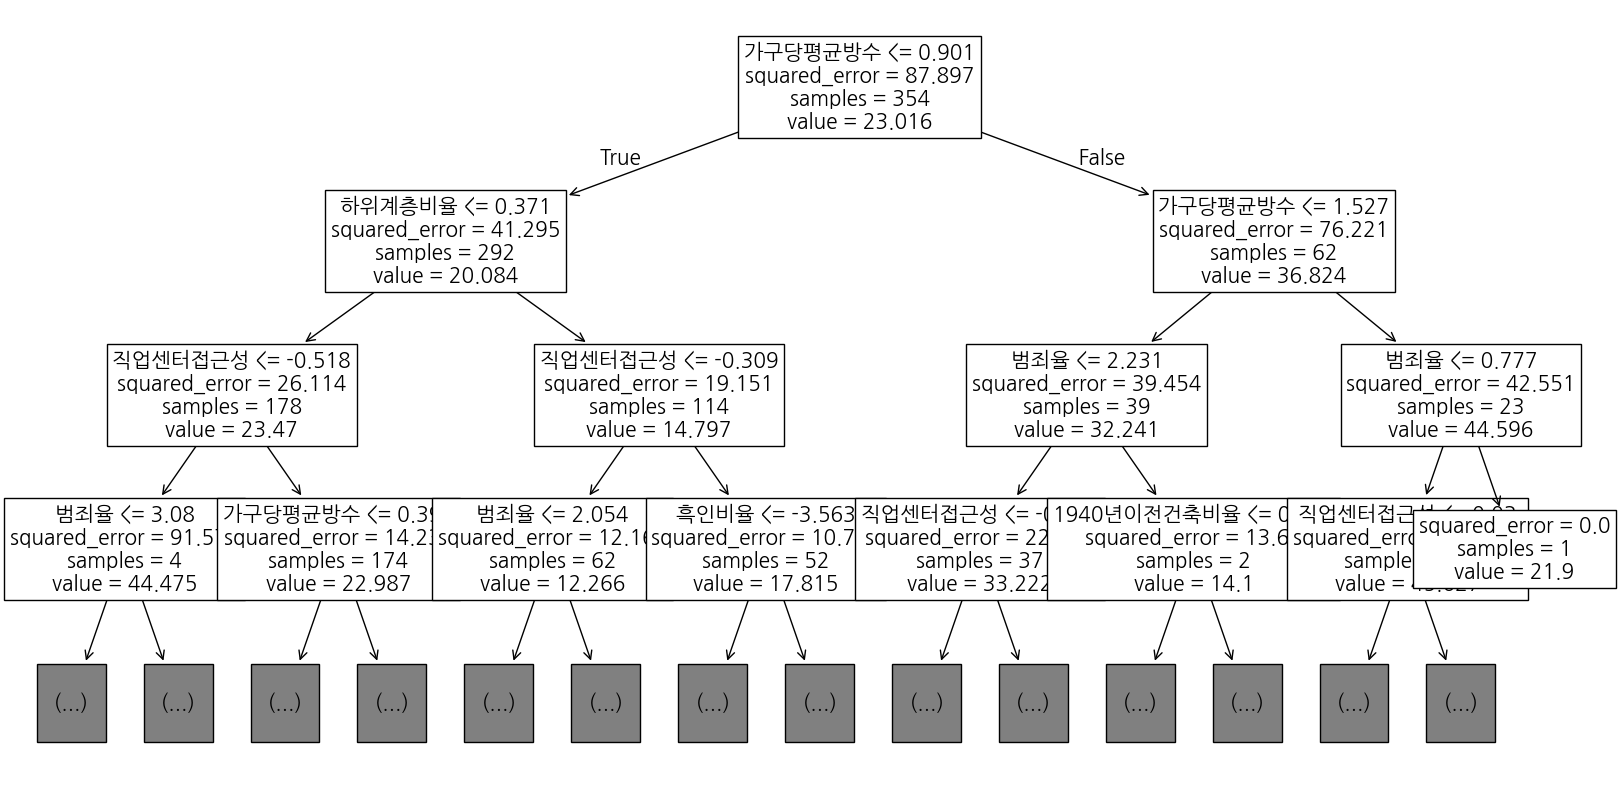

In [141]:
plt.figure(figsize=(20,10))
plot_tree(dtr, max_depth=3, feature_names=dtr.feature_names_in_, fontsize=15)

### 랜덤포레스트회귀모델(RandomForestRegressor)

In [137]:
rfr = RandomForestRegressor(max_depth=3, n_estimators=100, n_jobs=4, random_state=42)
rfr.fit(rs_X_train, y_train)
pred = rfr.predict(rs_X_test)

rfr_result = pd.DataFrame(rfr.feature_importances_, index=rfr.feature_names_in_)
display(rfr_result)

print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))
print('R2_Score: ', r2_score(y_test, pred))

,0
범죄율,0.019101
"25,000평방피트초과",0.000177
비소매상업지역비율,0.000667
찰스강경계,0.000490
농축 일산화질소,0.005174
가구당평균방수,0.471567
1940년이전건축비율,0.001456
직업센터접근성,0.059388
도로접근성,0.000989
재산세율,0.002586


MAE:  2.745342556730607
MSE:  14.333791913103536
RMSE:  3.7859994602619182
R2_Score:  0.8076339225492488


In [134]:
for i in range(1,11):
    rfr = RandomForestRegressor(max_depth=i, n_estimators=500, n_jobs=4, random_state=42)
    rfr.fit(rs_X_train, y_train)
    pred = rfr.predict(rs_X_test)

    print('='*30, f"max_depth = {i}", '='*30)
    rfr_result = pd.DataFrame(rfr.feature_importances_, index=rfr.feature_names_in_)
#     display(rfr_result)

    print('MAE: ', mean_absolute_error(y_test, pred))
    print('MSE: ', mean_squared_error(y_test, pred))
    print('RMSE: ', root_mean_squared_error(y_test, pred))
    print('R2_Score: ', r2_score(y_test, pred))
    print()

============================== max_depth = 1 ==============================
MAE:  3.854252712946796
MSE:  32.98662553170156
RMSE:  5.743398430520171
R2_Score:  0.5573043197264953

============================== max_depth = 2 ==============================
MAE:  3.1579787851802337
MSE:  19.156324746479402
RMSE:  4.376793888964776
R2_Score:  0.7429133147604678

============================== max_depth = 3 ==============================
MAE:  2.700325605010058
MSE:  14.027993890530254
RMSE:  3.7453963596033804
R2_Score:  0.8117378726031659

============================== max_depth = 4 ==============================
MAE:  2.4153431367431906
MSE:  11.880468014117914
RMSE:  3.4468054795880074
R2_Score:  0.8405586571920488

============================== max_depth = 5 ==============================
MAE:  2.257578849158933
MSE:  10.769672284798359
RMSE:  3.2817178862294605
R2_Score:  0.8554660465690991

============================== max_depth = 6 ==============================
MAE:  2.1653286

In [138]:
rfr = RandomForestRegressor(max_depth=9, n_estimators=500, n_jobs=4, random_state=42)
rfr.fit(rs_X_train, y_train)
pred = rfr.predict(rs_X_test)

rfr_result = pd.DataFrame(rfr.feature_importances_, index=rfr.feature_names_in_)
display(rfr_result)

print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))
print('R2_Score: ', r2_score(y_test, pred))

,0
범죄율,0.031669
"25,000평방피트초과",0.001484
비소매상업지역비율,0.006403
찰스강경계,0.001451
농축 일산화질소,0.014340
가구당평균방수,0.405731
1940년이전건축비율,0.013269
직업센터접근성,0.062451
도로접근성,0.004435
재산세율,0.011754


MAE:  2.0916265053752245
MSE:  9.392717135941648
RMSE:  3.06475400904243
R2_Score:  0.8739454177234296


### XGBooster회귀모델(XGBRegressor)

In [152]:
xgbr = XGBRegressor(max_depth=1, n_estimators=100, n_jobs=4, random_state=42)
xgbr.fit(rs_X_train, y_train)
pred = xgbr.predict(rs_X_test)

xgbr_result = pd.DataFrame(xgbr.feature_importances_, index=xgbr.feature_names_in_)
display(xgbr_result)

print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))
print('R2_Score: ', r2_score(y_test, pred))


,0
범죄율,0.033047
"25,000평방피트초과",0.000000
비소매상업지역비율,0.005381
찰스강경계,0.064744
농축 일산화질소,0.102278
가구당평균방수,0.268090
1940년이전건축비율,0.009124
직업센터접근성,0.024560
도로접근성,0.009539
재산세율,0.019307


MAE:  2.2903842631139253
MSE:  10.675373331971697
RMSE:  3.267318982280686
R2_Score:  0.8567315818700822


In [149]:
for i in range(1,11):
    xgbr = XGBRegressor(max_depth=i, n_estimators=500, n_jobs=4, random_state=42)
    xgbr.fit(rs_X_train, y_train)
    pred = xgbr.predict(rs_X_test)
    
    print('='*30, f"max_depth = {i}", '='*30)
    xgbr_result = pd.DataFrame(xgbr.feature_importances_, index=xgbr.feature_names_in_)
#     display(xgbr_result)

    print('MAE: ', mean_absolute_error(y_test, pred))
    print('MSE: ', mean_squared_error(y_test, pred))
    print('RMSE: ', root_mean_squared_error(y_test, pred))
    print('R2_Score: ', r2_score(y_test, pred))
    print()

============================== max_depth = 1 ==============================
MAE:  2.2932263600198843
MSE:  9.7079386400479
RMSE:  3.115756511675439
R2_Score:  0.8697150002148838

============================== max_depth = 2 ==============================
MAE:  2.147814269442308
MSE:  8.598524448484282
RMSE:  2.9323240694855475
R2_Score:  0.8846038487200859

============================== max_depth = 3 ==============================
MAE:  2.064177789813594
MSE:  8.269304683695822
RMSE:  2.8756398737838893
R2_Score:  0.889022129322703

============================== max_depth = 4 ==============================
MAE:  2.182313868873998
MSE:  11.212384632146474
RMSE:  3.348489903246906
R2_Score:  0.8495246433301894

============================== max_depth = 5 ==============================
MAE:  2.1043792523835836
MSE:  9.422778050995227
RMSE:  3.0696543862453356
R2_Score:  0.8735419864228712

============================== max_depth = 6 ==============================
MAE:  2.1110420873290

In [153]:
xgbr = XGBRegressor(max_depth=3, n_estimators=500, n_jobs=4, random_state=42)
xgbr.fit(rs_X_train, y_train)
pred = xgbr.predict(rs_X_test)

xgbr_result = pd.DataFrame(xgbr.feature_importances_, index=xgbr.feature_names_in_)
display(xgbr_result)

print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))
print('R2_Score: ', r2_score(y_test, pred))

,0
범죄율,0.038264
"25,000평방피트초과",0.002175
비소매상업지역비율,0.016819
찰스강경계,0.018145
농축 일산화질소,0.028200
가구당평균방수,0.267693
1940년이전건축비율,0.008394
직업센터접근성,0.062962
도로접근성,0.037436
재산세율,0.044966


MAE:  2.064177789813594
MSE:  8.269304683695822
RMSE:  2.8756398737838893
R2_Score:  0.889022129322703


### lightGBM회귀모델(LGBMRegressor)

In [156]:
# JSON 파싱에 걸리는 특수문자가 존재
# lgbr = LGBMRegressor(max_depth=1, n_estimators=100, n_jobs=4, random_state=42)
# lgbr.fit(rs_X_train, y_train)
# pred = lgbr.predict(rs_X_test)

# lgbr_result = pd.DataFrame(lgbr.feature_importances_, index=lgbr.feature_names_in_)
# display(lgbr_result)

# print('MAE: ', mean_absolute_error(y_test, pred))
# print('MSE: ', mean_squared_error(y_test, pred))
# print('RMSE: ', root_mean_squared_error(y_test, pred))
# print('R2_Score: ', r2_score(y_test, pred))
